## Задание № 2

### Урок 2.  Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### Задача № 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и
обучить линейную модель при помощи градиентного и стохастического градиентного спуска.
Нанести среднеквадратичную ошибку для обоих методов на один график,
сделать выводы о разнице скорости сходимости каждого из методов.


In [257]:
import numpy as np
import matplotlib.pyplot as plt



In [258]:
from sklearn import datasets

intercept = 20
n_samples = 100
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, coef=True,
                                      bias=intercept, noise=30,
                                      random_state=42)
coef

array(41.74110031)

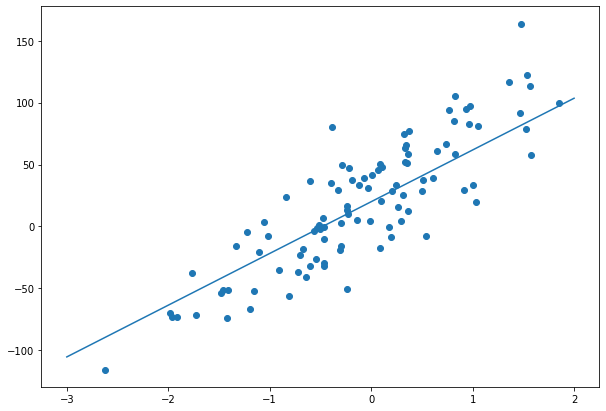

In [259]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)

In [260]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [261]:
def eval_model(X, y, iterations, alpha=1e-4):
    Way = []
    Err = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(w, X.T)
        err = calc_mse(y, y_pred)
        w -= (alpha * (1 / n * 2 * np.dot((y_pred - y), X)))
        Way.append([i, w])
        Err.append([err])
    return Way, Err

In [262]:
w, err = eval_model(X, y, iterations=500, alpha=1e-2)
w[-1][1], err[-1]
# (array([23.50675939, 49.81619045]), [730.628964658323])

(array([23.48598004, 49.80935638]), [702.4886441282404])

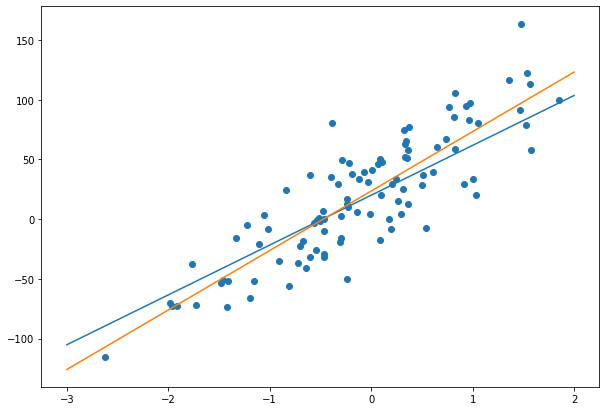

In [263]:
w_opt = w[-1][1]
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)
plt.plot(x, w_opt[0] + w_opt[1] * x)

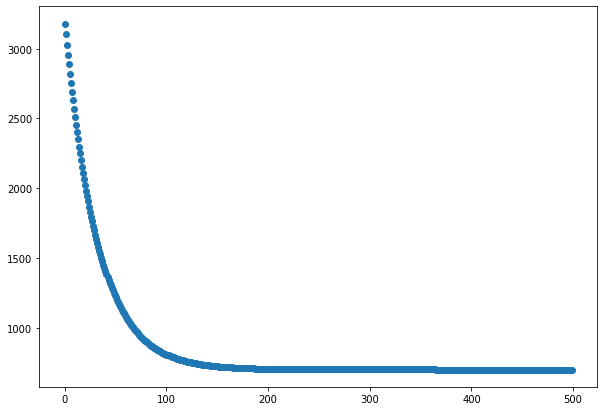

In [264]:
plt.figure(figsize=(10,7))
plt.scatter(list(range(0, 500)), err)


In [280]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    Way = []
    Err = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.randn(X.shape[1]) #
    n = X.shape[0] #
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, : ]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(w, X_tmp.T) #
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        Way.append([i, w])
        Err.append([err])
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return  Way, Err

In [282]:
w1, err1 = eval_sgd_model(X, y, iterations=500, qty_in_batch=1, alpha=1e-3)

50 [2.18016916 3.3314679 ] 402.87423902167495
100 [3.76691633 6.81931056] 423.5364634622784
150 [ 5.2358077  10.04541498] 443.15941392952834
200 [ 6.59557164 13.02943433] 461.75260809843377
250 [ 7.85429262 15.78954493] 479.3340621606424
300 [ 9.01945852 18.34255736] 495.92841364236614
350 [10.09800435 20.70401916] 511.56535110180795
400 [11.09635293 22.88830983] 526.2783056355257
450 [12.02045248 24.90872865] 540.1033653920965
500 [12.87581156 26.77757592] 553.0783797192305


In [271]:
w1[-1][1], err1[-1]

(array([23.50662103, 49.81591752]), [730.6260467520424])

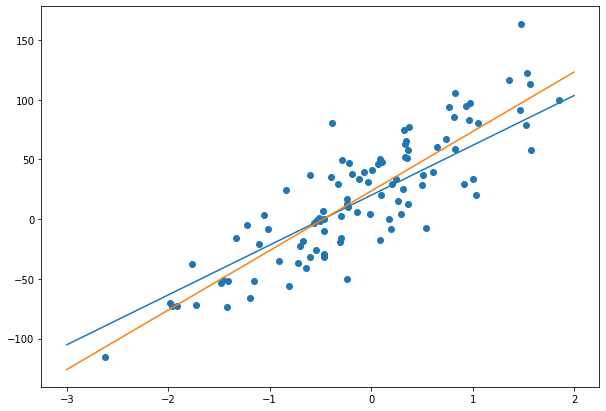

In [272]:
w_opt = w1[-1][1]
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
l = coef.tolist()
x = np.array([-3, 2])
plt.plot(x, intercept + l * x)
plt.plot(x, w_opt[0] + w_opt[1] * x)

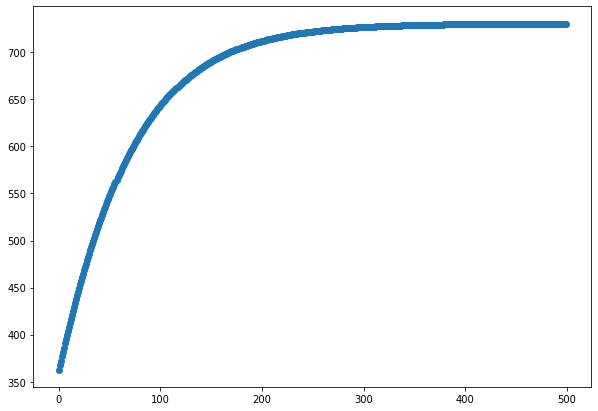

In [273]:
plt.figure(figsize=(10,7))
plt.scatter(list(range(0, 500)), err1)

#### Задача № 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации
(в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

#### Задача № 3 *

Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

